# Service Recommendation system for Telecommunication Company

In [94]:
!pip install scikit-learn

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [96]:
data = pd.read_csv(r'C:/Users/karan/Downloads/teleCust1000t.csv')

This data contains information about the region, tenure, age,martial, address, income,ed,employ, retire, gender, and reside. Based on the given information, we predict the custcat target variable using KNN algorithm. The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

In [97]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [98]:
data.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [99]:
data.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [100]:
# convert pandas dataframe to numpy array
x = data[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']].values
y = data['custcat'].values

In [101]:
#normalization of data
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 10)

In [103]:
k=4
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [104]:
y_pred=knn_model.predict(x_test)

In [105]:
print('Train Accuracy:',metrics.accuracy_score(y_train,knn_model.predict(x_train)))
print('Test Accuracy:',metrics.accuracy_score(y_test,y_pred))

Train Accuracy: 0.54625
Test Accuracy: 0.365


In [106]:
acc = []

for i in range(1,400):
    knn_model = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    y_pred = knn_model.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))
    
acc = np.array(acc)

print("Maximum Accuracy:", max(acc))
print("k:",acc.argmax()+1)
    

Maximum Accuracy: 0.505
k: 149


Text(0, 0.5, 'Accuracy')

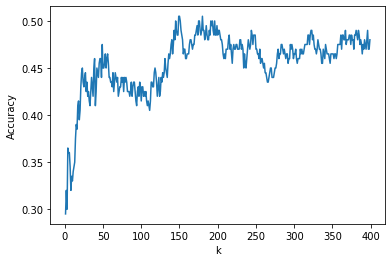

In [107]:
plt.plot(range(1,400),acc)
plt.xlabel("k")
plt.ylabel("Accuracy")

In [108]:
acc = np.array(acc)
print("Maximum Accuracy:", max(acc))
print("k:",acc.argmax()+1)

Maximum Accuracy: 0.505
k: 149
